[*********************100%***********************]  1 of 1 completed


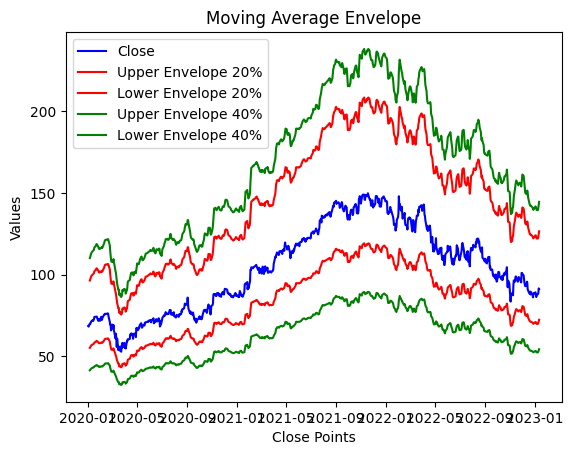

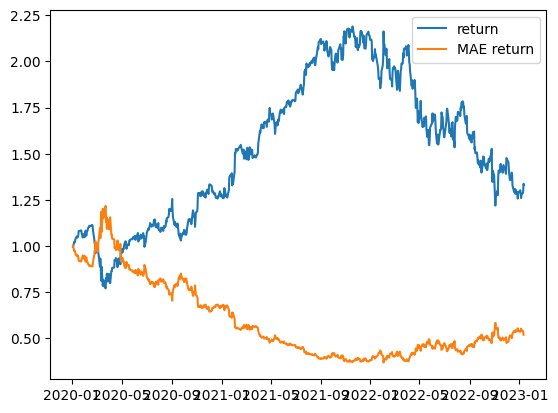

In [3]:
#importing the required libraries 
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
#creating a dataframe from the dataset
stock = "GOOGL"
df = yf.download(stock, '2020-01-01', '2023-1-13')
df["return"] = df['Close'].pct_change()

#calculating moving average
df['MA_3'] = df['Close'].rolling(window=3).mean()

#calculating the upper and lower envelopes
df['Upper_Envelope_3_20%'] = 1.4*df['MA_3'] 
df['Lower_Envelope_3_20%'] = 0.8*df['MA_3']

df['Upper_Envelope_3_40%'] = 1.6*df['MA_3']
df['Lower_Envelope_3_40%'] = 0.6*df['MA_3']

sig = 1*(df["Close"]<df['Lower_Envelope_3_40%'])-1*(df["Close"]>df['Lower_Envelope_3_40%'])
df["mae_return"]=sig[:-1]*df["return"][1:]

#visualizing the moving average envelope
plt.plot(df['Close'], color = 'blue', label = 'Close')
plt.plot(df['Upper_Envelope_3_20%'], color = 'red', label = 'Upper Envelope 20%')
plt.plot(df['Lower_Envelope_3_20%'], color = 'red', label = 'Lower Envelope 20%')
plt.plot(df['Upper_Envelope_3_40%'], color = 'green', label = 'Upper Envelope 40%')
plt.plot(df['Lower_Envelope_3_40%'], color = 'green', label = 'Lower Envelope 40%')
plt.title('Moving Average Envelope')
plt.xlabel('Close Points')
plt.ylabel('Values')
plt.legend()
plt.show()

plt.plot(np.cumprod(1+df['return']), label='return')
plt.plot(np.cumprod(1+df["mae_return"]), label = "MAE return")
plt.legend()
plt.show()